In [955]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random

# Input Data Read

In [956]:
path ='drive/MyDrive/Document/Documents/course/Datamining/HW3/hw3dataset/'

In [957]:
file_name = list()           # 所有file的名字
for file in os.listdir(path):
  file_name.append(file)
del file_name[-2]

In [958]:
file_name.sort(key = lambda s: s[6])

In [959]:
all_graph = list()
for file in file_name:

  all_graph.append(list())
  file_path = path + file

  fp = open(file_path, 'r')
  line = fp.readline()
  while line:
    all_graph[-1].append(eval(line.replace('\n','')))
    line = fp.readline()
  fp.close()

# add link

In [960]:
data  = [i for i in range(1,7)]
for i in range(4):
  for j in range(3):
    nodea = random.choice(data[:6-j])
    nodeb = 1
    edge = (nodea,nodeb) 
    if nodea == nodeb or edge in all_graph[j]:
      continue
    all_graph[j].append(edge)

# Define adjacency list

In [961]:
class ListNode(object):
  def __init__(self, value = None, next = None):
    self.val = value
    self.next = next

In [962]:
class LinkedList(object):
  def __init__(self, head = None):
    self.head = head

  def append(self, value):
    if not self.head:
        self.head = ListNode(value)
        return
    node = self.head
    while node.next:
        node = node.next
    node.next = ListNode(value)

  def print_nodes(self):
    if not self.head:
        print(self.head)
    node = self.head
    while node:
        end = " -> " if node.next else "\n"
        print(node.val, end=end)
        node = node.next
  def at(self, index):
    count = 0
    node = self.head
    while node:
        if count == index:
            return node.val
        count += 1
        node = node.next
  def length(self):
    if not self.head:
      return 0
    i = int()
    node = self.head
    while node:
      i += 1
      node = node.next
    return i

In [963]:
def create_graph( all_graph):
  graph_data = list()
  for graph in all_graph:
    graph_data.append(list())     # create a graph in list tail

    for edge in graph:
      flag = True            # To find whether the node in graph

      for linklist in graph_data[-1]:
        if linklist.head.val == edge[0]:
          linklist.append(edge[-1])
          flag = False
          break

      if flag:
        graph_data[-1].append(LinkedList())
        for i in range(2):
          graph_data[-1][-1].append(edge[i])
    
  return graph_data

In [964]:
# def create_graph_mtx(all_graph):
#   adj_matrix = list()
#   for graph in all_graph:


In [965]:
def print_allgraph( graph):
  for i in graph:
    print('-----------')
    for j in i:
      j.print_nodes()

In [966]:
adjlist_graph = create_graph( all_graph)

In [967]:
def create_init_ah( adjlist_graph):
  hits = list()
  for graph in adjlist_graph:
    dic1 = dict()
    for linklist in graph:
      node = linklist.head
      while node:
        temp = dict()
        temp[node.val] = 1
        node = node.next
        dic1.update(temp)
    dic2 = dic1.copy()
    hits.append( [dic1, dic2])
  return hits

In [968]:
def create_zero_ah( adjlist_graph):
  hits = list()
  for graph in adjlist_graph:
    dic1 = dict()
    for linklist in graph:
      node = linklist.head
      while node:
        temp = dict()
        temp[node.val] = 0
        node = node.next
        dic1.update(temp)
    dic2 = dic1.copy()
    hits.append( [dic1, dic2])
  return hits

In [969]:
hits = create_init_ah( adjlist_graph)

# HITS Algo.

In [970]:
def init_ah(hits):
  for G in hits:
    for i in range(2):
      sums = sum( G[i].values( ))
      for k, v in G[i].items():
        G[i][k] = v/sums
  return hits

In [971]:
def calculate_ah( hits, adjlist_graph):
  new_dict = create_zero_ah( adjlist_graph)
  for i in range( len( adjlist_graph ) ):

    for linklist in adjlist_graph[i]:
      node = linklist.head
      head_val = node.val
      node = node.next

      while node:
        new_dict[i][1][node.val] += hits[i][0][head_val]
        new_dict[i][0][head_val] += hits[i][1][node.val]
        node = node.next
        
  return new_dict

In [972]:
new_hits = calculate_ah( hits, adjlist_graph)
new_hits = init_ah(new_hits)
for i in range(20):
  del hits
  hits = new_hits
  del new_hits
  hits = init_ah(hits)
  new_hits = calculate_ah(hits, adjlist_graph)
  new_hits = init_ah(new_hits)

## write

In [973]:
for i in range(len(new_hits)):

  f = open('graph_'+str(i+1)+'_HITS_hub.txt','w')
  temp = list(new_hits[i][0].values())
  for j in range(len(temp)):
    if j < len(temp) - 1:
      f.write(str(temp[j])+' ')
    else:
      f.write(str(temp[j])+'\n')
  f.close()

  f = open('graph_'+str(i+1)+'_HITS_authority.txt','w')
  tem = list(new_hits[i][1].values())
  for j in range(len(tem)):
    if j < len(tem) - 1:
      f.write(str(tem[j])+' ')
    else:
      f.write(str(tem[j])+'\n')

  f.close()

result : news_hits

# PageRank Algo.

In [974]:
def create_init_pr( adjlist_graph):
  pr = list()
  for graph in adjlist_graph:
    dic1 = dict()
    for linklist in graph:
      node = linklist.head
      while node:
        temp = dict()
        temp[node.val] = 1
        node = node.next
        dic1.update(temp)
    pr.append( dic1)
  return pr

In [975]:
def create_zero_pr( adjlist_graph):
  pr = list()
  for graph in adjlist_graph:
    dic1 = dict()
    for linklist in graph:
      node = linklist.head
      while node:
        temp = dict()
        temp[node.val] = 0
        node = node.next
        dic1.update(temp)
    pr.append( dic1)
  return pr

In [976]:
pr = create_init_pr(adjlist_graph)

In [977]:
def init_pr(pr):
  for G in pr:
    sums = sum( G.values( ))
    if sums == 0:
      continue
    for k, v in G.items():
      G[k] = v/sums
  return pr

In [978]:
def calculate_pr(pr, adjlist_graph, damping_factor = 0.15):
  new_pr = create_zero_pr( adjlist_graph)
  for i in range( len( pr ) ):
    for linklist in adjlist_graph[i]:
      linklist_lens = linklist.length() - 1
      node = linklist.head
      head_val = node.val
      node = node.next
      while node:
        new_pr[i][node.val] += pr[i][head_val] / linklist_lens
        node = node.next
    n = len(pr[i])
    for k, v in new_pr[i].items():
      new_pr[i][k] = ( damping_factor / n ) + (1 - damping_factor) * v
  return new_pr

In [979]:
new_pr = calculate_pr( pr, adjlist_graph)
new_pr = init_pr(new_pr)
for i in range(100):
  del pr
  pr = new_pr
  del new_pr
  pr = init_pr(pr)
  new_pr = calculate_pr(pr, adjlist_graph)
  new_pr = init_pr(new_pr)

## write

In [980]:
for i in range(len(new_pr)):

  f = open('graph_'+str(i+1)+'_PageRank.txt','w')
  temp = list(new_pr[i].values())
  for j in range(len(temp)):
    if j < len(temp) - 1:
      f.write(str(temp[j])+' ')
    else:
      f.write(str(temp[j])+'\n')
  f.close()

# SimRank

Matrix form of S

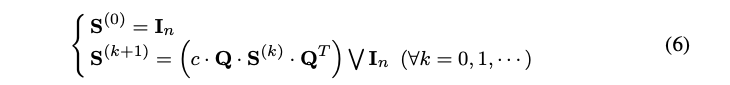


In [981]:
def create_zero_adjmtx(pr):
  adjmtx = list()
  for i in range(len(pr)):
    adjmtx.append(list())
    for j in range(len(pr[i])):
      row = [0 for k in range(len(pr[i]))]
      adjmtx[i].append(row)
    adjmtx[i] = np.array(adjmtx[i], dtype = 'float32' )
  return adjmtx

In [982]:
def identity_mtx(n):
  result = list()
  for i in range(n):
    result.append(list())
    for j in range(n):
      if i == j:
        result[i].append(1)
        continue
      result[i].append(0)
  return np.array(result , dtype = 'float32')

In [983]:
adjmtx = create_zero_adjmtx(pr[0:5])

In [984]:
def create_adjmtx(all_graph, adjmtx):
  for i in range(len(all_graph)):
    for edge in all_graph[i]:
      adjmtx[i][edge[0] - 1][edge[1] - 1] = 1.0
  return adjmtx

In [985]:
def normalize_mtx(adjmtx):
  for i in range(len(adjmtx)):
    for j in range(len(adjmtx[i])):
      sums = sum(adjmtx[i][j])
      if sums != 0:
        for k in range(len(adjmtx[i][j])):
          adjmtx[i][j][k] = adjmtx[i][j][k] / sums
  return adjmtx

In [986]:
adjmtx = create_adjmtx(all_graph[0:5] ,adjmtx)
for i in range(len(adjmtx)):
  adjmtx[i] = adjmtx[i].transpose()
adjmtx = normalize_mtx(adjmtx)

In [987]:
def calculate_sim(adjmtx, S, C = 0.5):
  return C * ( np.matmul( np.matmul(adjmtx , S) , adjmtx.transpose()) ) + (1-C) * identity_mtx(len(adjmtx))

In [988]:
def calculate_allsim(adjmtx, S):
  result = list()
  for i in range(len(adjmtx)):
    result.append(calculate_sim(adjmtx[i], S[i]))
  return result

In [989]:
new_S = list()
for graph in adjmtx:
  S = identity_mtx( len(graph))
  new_S.append(calculate_sim(graph, S))
# for i in range(3):
#   S = new_S
#   new_S = calculate_allsim(adjmtx, new_S)

In [990]:
new_S[0]

array([[0.75, 0.  , 0.25, 0.  , 0.25, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]], dtype=float32)

## write

In [991]:
for i in range(len(new_S)):

  f = open('graph_'+str(i+1)+'_SimRank.txt','w')
  new_S[i] = list(new_S[i])
  for j in range(len(new_S[i])):
    temp = new_S[i][j]
    for k in range(len(temp)):
      if k < len(temp) - 1:
        f.write(str(temp[k])+' ')
      else:
        f.write(str(temp[k])+'\n')
  f.close()

# 雜事

In [992]:
# g7 = list()
# fp = open('graph_7.txt', 'r')
# line = fp.readline()
# while line:
#   temp = line.replace('\n','')
#   temp = temp.replace('      ',',')
#   g7.append(eval(temp)[1:3])
#   line = fp.readline()
# fp.close()

In [993]:
# g7_f = [[] for i in range(1,829)]

# for i in range(len(g7)):
#   g7_f[g7[i][0] - 1].append(g7[i][1])
  

In [994]:
# import random
# g7 = list()
# for i in range(len(g7_f)):
#   for j in range(len(g7_f[i])):
#     temp = g7_f[i][j],random.choice(g7_f[i][:j] + g7_f[i][j+1:])
#     g7.append(temp)

In [995]:
# f = open('graph_7.txt','w')
# for i in range(len(g7)):
#   f.write(str(g7[i][0])+','+str(g7[i][1])+'\n')
# f.close()

In [996]:
# for a in lisa:
#   del g7_f[a]

In [997]:
# lisa = list()
# for i in range(len(g7_f)-1,-1,-1):
#   if len(g7_f[i]) == 1:
#     lisa.append(i)

# Result Graph

In [998]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [999]:
import pygraphviz as pgv

In [1000]:
G  = pgv.AGraph(directed=True)

In [1001]:
for node in pr[0]:
  G.add_node(str(node))

In [1002]:
for edge in all_graph[0]:
  G.add_edge(str(edge[0]),str(edge[1]))

In [1003]:
G.node_attr.update(color = 'black',shape = 'cube')

In [1004]:
G.layout()
G.draw('g.png')


/usr/local/lib/python3.6/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: using box for unknown shape cube

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


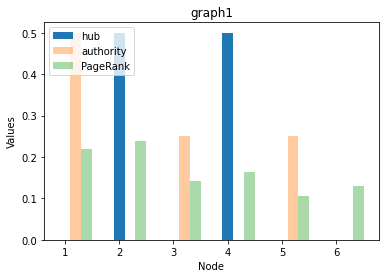

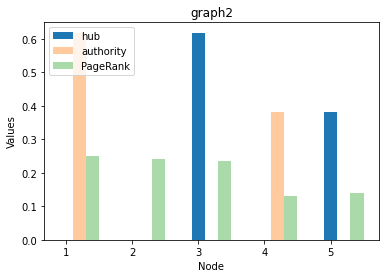

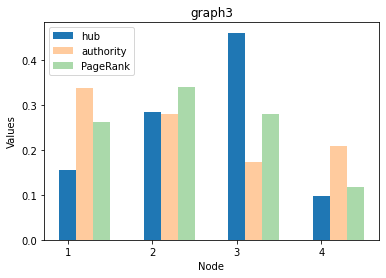

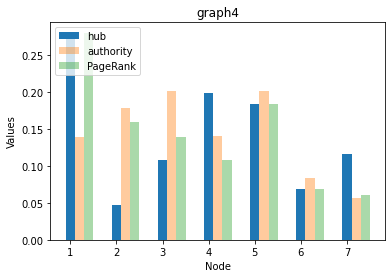

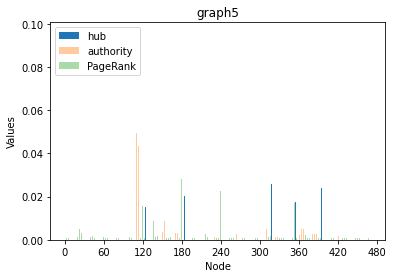

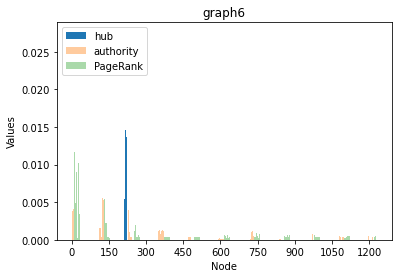

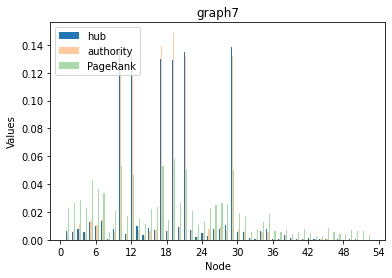

In [1005]:
for i in range(len(new_hits)):
  ax = plt.figure().gca()
  x = np.arange(1,len(new_pr[i])+1,1)
  
  bar_width = 0.2
  opacity = 0.4

  ax.bar(x, new_hits[i][0].values(), bar_width, label='hub')
  ax.bar(x + bar_width, new_hits[i][1].values(), bar_width, alpha=opacity, label='authority')
  ax.bar(x + bar_width*2, new_pr[i].values() , bar_width, alpha=opacity, label='PageRank')
  ax.set_xlabel('Node')
  ax.set_ylabel('Values')
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  legends = ['hub', 'authority', 'PageRank']
  ax.legend(legends, loc=2)
  ax.set_title("graph" + str(i + 1))
  plt.show()
